In [223]:
import csv
import pickle
import re
from datetime import datetime
import numpy as np
# randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from urllib import urlopen
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from __future__ import division
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn import tree
from sklearn.externals.six import StringIO
import os
from sklearn.externals.six import StringIO  
import pydot
from sklearn.cross_validation import StratifiedKFold


## Variables Pre-processing

### Categorical:

01 - contact: cellular = 1

02 - job: student, retired = 1

03 - marital: single = 1

04 - poutcome (failure, nonexistent, success): success = 1

### Continuous:

05 - age: parabola centered around age 47

06 - campaign (contacts in present campaign): 1 / value

07 - emp.var.rate: 1 - normalized value

08 - euribor3m: 1- normalized value

09 - pdays (days from last campaign contact, or 999): !=999 = 1

10 - previous (number of contacts in previous campaign): !=0 = 1

In [224]:
bank_full = read_csv('bank-additional-full.csv', delimiter=';', header=0)
bank_full.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [225]:
bank = bank_full[['age','job','marital','contact','campaign','emp.var.rate','euribor3m','y']]
bank.head(3)

,age,job,marital,contact,campaign,emp.var.rate,euribor3m,y
0,56,housemaid,married,telephone,1,1.1,4.857,no
1,57,services,married,telephone,1,1.1,4.857,no
2,37,services,married,telephone,1,1.1,4.857,no


In [226]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [227]:
bank['age'] =((bank['age']-47)/30) ** 2
#bank['age'][bank['age'] < 36] = abs((bank['age']-36)/19)
#bank['age'][bank['age'] >= 36] = 0
#bank['age'][bank['age'] > 58] = abs((bank['age']-58)/19)
bank['age'][bank['age'] > 1] = 1

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [228]:
bank['job'][bank['job'] == 'student'] = 1
bank['job'][bank['job'] == 'retired'] = 1
bank['job'][bank['job'] != 1] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [229]:
bank['marital'][bank['marital'] == 'single'] = 1
bank['marital'][bank['marital'] != 1] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [230]:
bank['contact'][bank['contact'] == 'cellular'] = 1
bank['contact'][bank['contact'] != 1] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [231]:
bank['campaign'] = 1 / bank['campaign']

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [232]:
#bank['pdays'][bank['pdays'] != 999] = 1
#bank['pdays'][bank['pdays'] == 999] = 0

In [233]:
#bank['previous'][bank['previous'] != 0] = 1
#bank['previous'][bank['previous'] != 1] = 0

In [234]:
#bank['poutcome'][bank['poutcome'] == 'failure'] = 0
#bank['poutcome'][bank['poutcome'] == 'nonexistent'] = 0
#bank['poutcome'][bank['poutcome'] == 'success'] = 1

In [235]:
bank['emp.var.rate'] = abs((bank['emp.var.rate'] - 1.4) / 4.8)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [236]:
bank['euribor3m'] = 1 - (bank['euribor3m'] / 5.5)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [237]:
bank.head(5)

,age,job,marital,contact,campaign,emp.var.rate,euribor3m,y
0,0.090000,0,0,0,1,0.0625,0.116909,0
1,0.111111,0,0,0,1,0.0625,0.116909,0
2,0.111111,0,0,0,1,0.0625,0.116909,0
3,0.054444,0,0,0,1,0.0625,0.116909,0
4,0.090000,0,0,0,1,0.0625,0.116909,0


In [238]:
byes = bank[bank['y'] == 1]
bno = bank[bank['y'] == 0]

In [239]:
len(byes)

4640

In [240]:
len(bno)

36548

In [241]:
mean(byes)

age             0.244659
job             0.152802
marital         0.349138
contact         0.830388
campaign        0.691456
emp.var.rate    0.548635
euribor3m       0.613975
y               1.000000
dtype: float64

In [242]:
mean(bno)

age             0.163570
job             0.051603
marital         0.272190
contact         0.609910
campaign        0.626513
emp.var.rate    0.239818
euribor3m       0.307002
y               0.000000
dtype: float64

In [243]:
sum(mean(byes))

4.4310540077585046

In [244]:
sum(mean(bno))

2.2706056756080022

In [245]:
X = bank.drop('y', 1)
y = bank['y']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=0)

In [246]:
print X.shape, X_train.shape, X_test.shape

(41188, 7) (32950, 7) (8238, 7)


In [247]:
acc_scores = {}
for n in range(20):
    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
    y_pred_knn = clf.predict(X_test)
    acc_scores.setdefault((n+1), [])
    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred_knn))

In [248]:
print acc_scores

{1: [0.84510803593105122], 2: [0.88953629521728572], 3: [0.88164603058994906], 4: [0.88892935178441368], 5: [0.88856518572469045], 6: [0.89014323865015776], 7: [0.89111434814275314], 8: [0.89257101238164605], 9: [0.89123573682932755], 10: [0.89244962369507164], 11: [0.89208545763534841], 12: [0.89244962369507164], 13: [0.891964068948774], 14: [0.8932993445010925], 15: [0.89220684632192282], 16: [0.89123573682932755], 17: [0.89111434814275314], 18: [0.8906287933964554], 19: [0.88953629521728572], 20: [0.89184268026219959]}


In [249]:
nmax = max(acc_scores, key=acc_scores.get)
nmax

14

In [250]:
clf = KNeighborsClassifier(n_neighbors = (nmax))
knn_model = clf.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)

In [251]:
X_test = X_test.astype(float)
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)

In [252]:
clf = GaussianNB()
gnb_model = clf.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
y_proba_gnb = gnb_model.predict_proba(X_test)

In [253]:
clf = SVC(probability=True)
svc_model = clf.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.predict_proba(X_test)

In [254]:
clf = DecisionTreeClassifier()
dtc_model = clf.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
y_proba_dtc = dtc_model.predict_proba(X_test)

In [255]:
clf = RandomForestClassifier()
rfc_model = clf.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
y_proba_rfc = rfc_model.predict_proba(X_test)

In [256]:
#clf = tree.DecisionTreeClassifier()
#tdt_model = clf.fit(X_train, y_train)
#y_pred_tdt = tdt_model.predict(X_test)
#y_proba_tdt = tdt_model.predict_proba(X_test)
#accuracy_score(y_test, y_pred_tdt)

In [257]:
#with open("bank.dot", 'w') as f:
#    f = tree.export_graphviz(clf, out_file=f)
#os.unlink('bank.dot')
#dot_data = StringIO() 
#tree.export_graphviz(clf, out_file=dot_data) 
#graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("bank.pdf")

# GLM ?

In [258]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_knn[:,1])
roc_auc_knn = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_knn, pos_label = None, average = None)

(array([ 0.90605296,  0.56493506]),
 array([ 0.98169149,  0.18933624]),
 array([ 0.94235688,  0.28361858]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


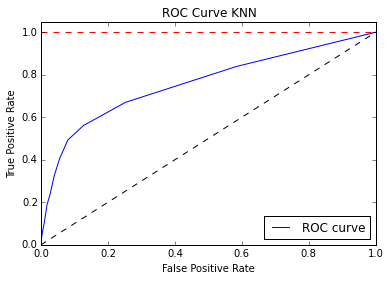

In [259]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.show()

In [260]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_log[:,1])
roc_auc_log = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_log, pos_label = None, average = None)

(array([ 0.88974078,  0.61904762]),
 array([ 0.99890695,  0.01414581]),
 array([ 0.9411689 ,  0.02765957]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


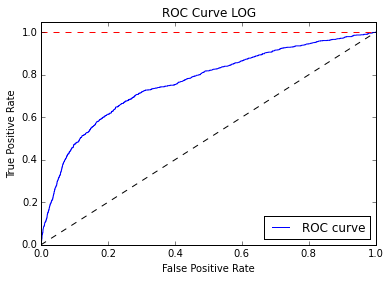

In [261]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LOG')
plt.legend(loc="lower right")
plt.show()

In [262]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_gnb[:,1])
roc_auc_gnb = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_gnb, pos_label = None, average = None)

(array([ 0.92288243,  0.33065237]),
 array([ 0.89766362,  0.40261153]),
 array([ 0.91009835,  0.36310108]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


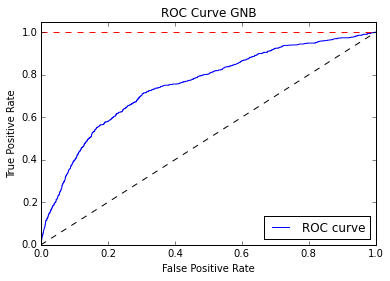

In [263]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve GNB')
plt.legend(loc="lower right")
plt.show()

In [264]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_svc[:,1])
roc_auc_svc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_svc, pos_label = None, average = None)

/usr/local/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 0.8884438,  0.       ]),
 array([ 1.,  0.]),
 array([ 0.94092691,  0.        ]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


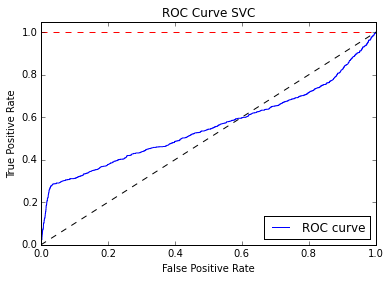

In [265]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC')
plt.legend(loc="lower right")
plt.show()

In [266]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_dtc[:,1])
roc_auc_dtc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_dtc, pos_label = None, average = None)

(array([ 0.91150674,  0.40567613]),
 array([ 0.95135948,  0.26441785]),
 array([ 0.93100682,  0.3201581 ]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


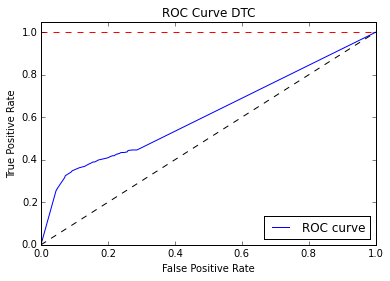

In [267]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_dtc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DTC')
plt.legend(loc="lower right")
plt.show()

In [268]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_rfc[:,1])
roc_auc_rfc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_rfc, pos_label = None, average = None)

(array([ 0.91182573,  0.45437262]),
 array([ 0.96078699,  0.26006529]),
 array([ 0.93566629,  0.33079585]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


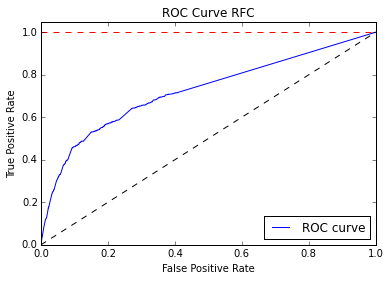

In [269]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RFC')
plt.legend(loc="lower right")
plt.show()

In [270]:
X = X.astype(float)
cv = StratifiedKFold(y, n_folds=6)

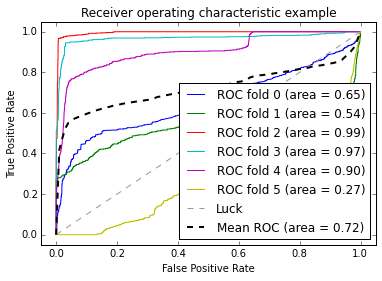

In [271]:
classifier = LogisticRegression()
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    # Compute ROC curve and area the curve
    probas_ = classifier.fit(X.iloc[train,:], y[train]).predict_proba(X.iloc[test,:])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [272]:
accuracy_score(y_test, y_pred_knn)

0.8932993445010925

In [273]:
accuracy_score(y_test, y_pred_log)

0.88905074047098809

In [274]:
accuracy_score(y_test, y_pred_gnb)

0.84243748482641423

In [275]:
accuracy_score(y_test, y_pred_svc)

0.88844379703811605

In [276]:
accuracy_score(y_test, y_pred_dtc)

0.87472687545520755

In [277]:
accuracy_score(y_test, y_pred_rfc)

0.88261714008254433

In [278]:
roc_auc_knn

0.75865058835195887

In [279]:
roc_auc_log

0.76355925765083532

In [280]:
roc_auc_gnb

0.75023873201964675

In [281]:
roc_auc_svc

0.55415473997723219

In [282]:
roc_auc_dtc

0.61450394957837018

In [283]:
roc_auc_rfc

0.72418642670016364

In [284]:
px2 = X_test.reshape((-1,7))
X_err = pd.DataFrame({'age':px2[:,0],'job':px2[:,1],'marital':px2[:,2],'contact':px2[:,3],'campaign':px2[:,4],'emp.var.rate':px2[:,5],'euribor3m':px2[:,6]})

In [285]:
y_err = y_pred_log - y_test

In [286]:
indneg = []
indpos = []
for r in range(len(y_err)):
    if y_err[r] == 1:
        indpos.append(r)
    if y_err[r] == -1:
        indneg.append(r)

print len(indneg), len(indpos)

906 8


In [287]:
X_ones_missed = X_err.iloc[indneg,:]

In [288]:
X_zeroes_missed = X_err.iloc[indpos,:]

In [289]:
mean(byes)

age             0.244659
job             0.152802
marital         0.349138
contact         0.830388
campaign        0.691456
emp.var.rate    0.548635
euribor3m       0.613975
y               1.000000
dtype: float64

In [290]:
mean(bno)

age             0.163570
job             0.051603
marital         0.272190
contact         0.609910
campaign        0.626513
emp.var.rate    0.239818
euribor3m       0.307002
y               0.000000
dtype: float64

In [291]:
sum(mean(byes))

4.4310540077585046

In [292]:
sum(mean(bno))

2.2706056756080022

In [293]:
mean(X_ones_missed)

age             0.237925
campaign        0.689672
contact         0.822296
emp.var.rate    0.542724
euribor3m       0.606082
job             0.146799
marital         0.346578
dtype: float64

In [294]:
mean(X_zeroes_missed)

age             0.975417
campaign        1.000000
contact         1.000000
emp.var.rate    0.854167
euribor3m       0.862318
job             1.000000
marital         0.250000
dtype: float64

In [295]:
sum(mean(X_ones_missed))

3.3920769256713958

In [296]:
sum(mean(X_zeroes_missed))

5.9419015151515158